In [ ]:
# Yan Yan
# 1005387582

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load data file
df=pd.read_csv('INF2178_A4_data.csv')
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [2]:
# Descriptive statistics for MMSE scores
mmse_stats = df['MMSE'].describe()
print("MMSE Descriptive Statistics:")
mmse_stats

MMSE Descriptive Statistics:


count    293.000000
mean      27.259386
std        3.413454
min       15.000000
25%       26.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

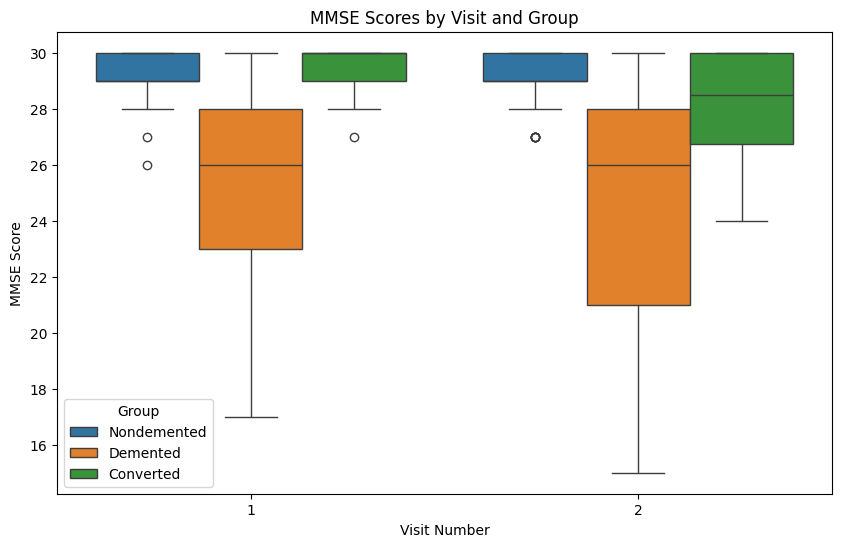

In [3]:
# Box plot to compare MMSE scores between different groups and visits
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Visit', y='MMSE', hue='Group')
plt.title('MMSE Scores by Visit and Group')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.show()

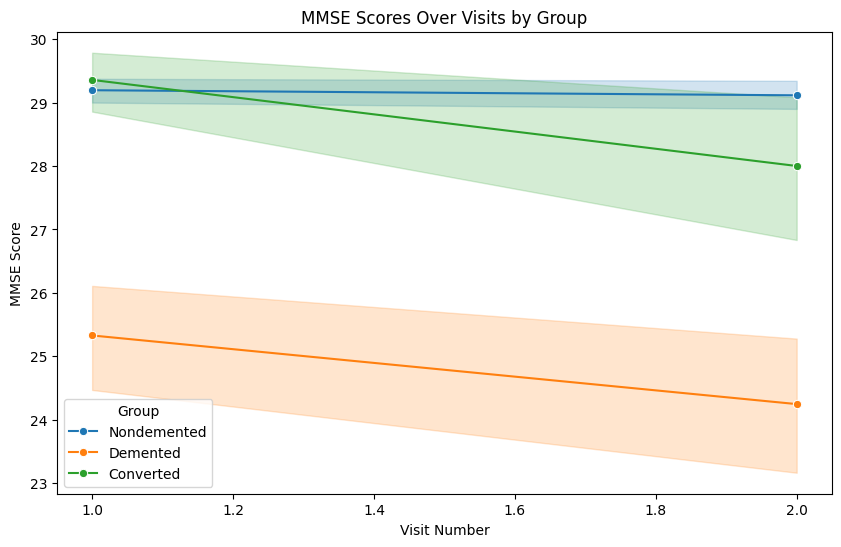

In [4]:
# Trend of MMSE scores over visits for each group
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Visit', y='MMSE', hue='Group', marker='o')
plt.title('MMSE Scores Over Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.show()

<ipython-input-5-ad3e31f67e7d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset, bins=bins, label=f'{group}')
<ipython-input-5-ad3e31f67e7d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset, bins=bins, label=f'{group}')
<ipython-input-5-ad3e31f67e7d>:12: UserWarning: 

`distplot`

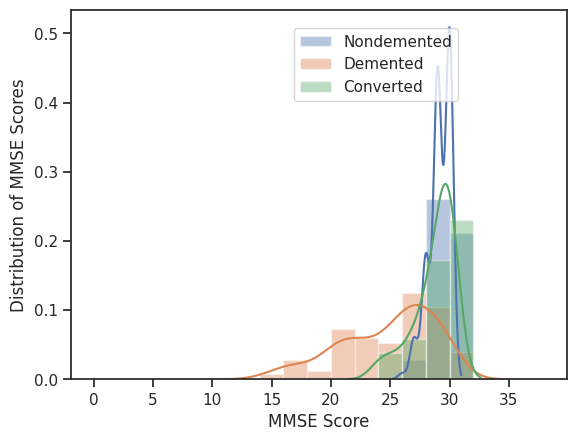

In [5]:
import numpy as np
%matplotlib inline
sns.set(style="ticks")
bins = np.arange(0,40,2)

mmse_range = df['MMSE'].max() - df['MMSE'].min()


# Plotting the distributions for each group
for group in df['Group'].unique():
    subset = df[df['Group'] == group]['MMSE'].values
    sns.distplot(subset, bins=bins, label=f'{group}')

# Setting the labels and legend
plt.xlabel('MMSE Score')
plt.ylabel('Distribution of MMSE Scores')
plt.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)


plt.show()


In [6]:
!pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='MMSE', within='Visit', subject='Subject ID', data=df, detailed=True)
res


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.4 MB/s eta 0:00:00


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Visit,22.377622,1,22.377622,8.573747,0.003974,0.006629,1.0
1,Error,370.622378,142,2.610017,NaN,NaN,NaN,NaN


In [7]:
df.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                   
1     Converted    29.36  0.93
      Demented     25.33  3.32
      Nondemented  29.19  0.85
2     Converted    28.00  2.09
      Demented     24.25  4.40
      Nondemented  29.11  0.96

In [8]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)

pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



In [9]:
# Conducting the post hoc tests using pairwise t-tests
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.928  142.000  two-sided        0.004               5.530     0.162
Group          -        Converted  Demented     False     True           6.739   51.065  two-sided        0.000         2036000.000     1.167
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.449   64.318  two-sided        0.000  22070000000000.000    -1.754
Visit * Group  1        Converted  Demented     False     True           8.012   60.516  two-sided        0.000       318700000.000

In [10]:
#checking assumptions
#mauchly's test of spericity
sphericity_test = pg.sphericity(data=df, dv='MMSE', subject='Subject ID', within='Visit')[-1]
sphericity_test

1.0

In [11]:
#test of normality
normality_test = pg.normality(data=df, dv='MMSE', group='Visit')
normality_test

,W,pval,normal
Visit,,,
1,0.787462,1.761304e-13,False
2,0.760728,5.430693e-14,False


In [12]:
from statsmodels.stats.power import TTestIndPower

# Given parameters
effect_size = 0.7
alpha = 0.05
power = 0.91

# Initialize the power analysis object
analysis = TTestIndPower()

# Calculate the sample size needed for the given effect size, power, and significance level
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)
print(f'Sample size/Number needed in each group: {sample_size:.3f}')

Sample size/Number needed in each group: 45.451


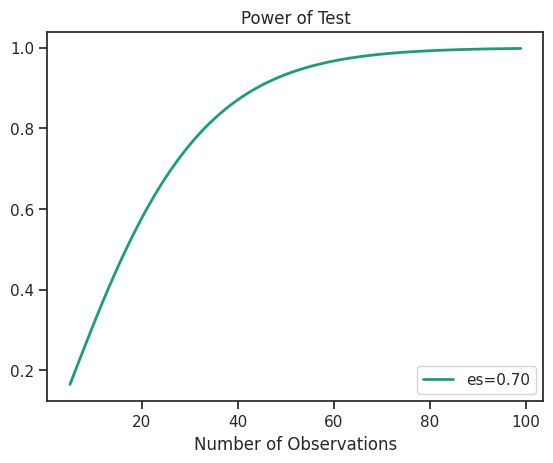

In [13]:
# Generate a range of sample sizes for plotting
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=np.array([effect_size]))


plt.show()